<a href="https://colab.research.google.com/github/felipe-sanches/anatel-BA-2019/blob/master/An%C3%A1lise_ANATEL_BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img alt="Creta" width="100%" src="https://github.com/felipe-sanches/anatel-BA-2019/blob/master/Nepa-for-Telecom-768x422.jpeg?raw=true"></center>



# Análise de Dados das reclamações ANATEL na Bahia

A Agência Nacional de Telecomunicações (Anatel) é a primeira agência reguladora a ser instalada no Brasil , criada pela Lei 9.472, de 16 de julho de 1997.

De acordo com o planejamento estratégico da Anatel para o período 2015 a 2024, sua missão é "regular o setor de telecomunicações para contribuir com o desenvolvimento do Brasil".

A Agência é uma autarquia administrativamente independente, financeiramente autônoma, não subordinada hierarquicamente a nenhum órgão de governo. Última instância administrativa, as decisões da Anatel só podem ser contestadas judicialmente.

## Dados abertos

O Plano de Dados Abertos da ANATEL, é o documento orientador para as ações de implementação e promoção de abertura de dados. o Plano tem sintonia com o Planejamento Estratégico da Agência, que estabelece a promoção da disseminação de dados como um dos seus objetivos.

Dados abertos são dados acessíveis ao público, representados em meio digital, estruturados em formato aberto (não proprietário), processáveis por máquina, referenciados na internet e disponibilizados sob licença aberta que permita sua livre utilização, consumo ou cruzamento, limitando-se a creditar a autoria ou a fonte.

Nesse sentido, a Anatel já tem promovido diversas ações voltadas para a disponibilização de dados setoriais, tanto para outros órgãos públicos ou empresas como para os usuários em geral. Contudo, esse objetivo de promover a disseminação de dados e informações setoriais visa elevar os esforços a outro nível, de modo a permitir a verdadeira integração informacional entre instituições cuja atividade está intimamente relacionada ao setor e dar a devida publicidade aos resultados regulatórios da Agência, angariando insumos de retroalimentação para a melhoria dos seus processos.

---
Neste notebook serão analisados dados referentes aos registros de reclamações, denúncias, pedidos de informação e sugestões em relação às operadoras e à Anatel.









## Obtenção dos dados

O Dataset utilizado nesta análise está disponível no Portal Brasileiro de Dados Abertos neste [endereço](http://www.dados.gov.br/dataset/solicitacoesregistradasnaanatel).

Para esta análise exploratória será baixado apenas o seguinte arquivo:

* `Solicitações Registradas na Anatel (2019-BA).csv`


In [1]:
#importando pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#importando o arquivo para um dataframe
df = pd.read_csv('https://raw.githubusercontent.com/felipe-sanches/anatel-BA-2019/master/Solicita%C3%A7%C3%B5es%20Registradas%20na%20Anatel%20(2019-BA).csv', sep = ';', encoding='latin-1')


### Análise dos dados

Nesta etapa o objetivo é compreender a estrutura do Dataset, e avaliar a sua situação atual.

**Dicionário de termos:**

* `Ano:` ano de registro da solicitação.

* `Canal de Entrada:` os canais pelos quais a Anatel pode receber solicitações (Fale Conosco, 1331, Aplicativo, etc.), ou seja, o canal de atendimento usado pelo consumidor para registrar a solicitação.

* `Condição:` Informa se a solicitação já foi reaberta. Solicitações que nunca foram reabertas permanecem como “Nova”, do contrário constam como “Reaberta”.

* `Data da Extração:` data em que os dados foram extraídos da base do sistema Focus da Anatel para consolidação.

* `Grupo Econômico:` grupo econômico segundo a marca a que se refere a solicitação. Assim, por exemplo, apesar de Claro e Net pertencerem ao mesmo grupo econômico, as marcas são distintas e, portanto, aparecem separadas.

* `Mês:` mês de registro da solicitação.

* `Modalidade:` as modalidades pretendem indicar, em um nível mais amplo, o tema ao qual estão atreladas as solicitações registradas e são subdividas em motivos.

* `Motivos:` os motivos expressam a natureza das demandas com mais detalhes.

* `ND:` Não declarada.

* `Prestadora:` empresa que possui autorização ou concessão da Anatel para a exploração de serviços de telecomunicações.

* `Quantidade de Solicitações:` quantidade de solicitações registradas na Anatel.

* `SCM:` Serviço de Comunicação Multimídia (banda larga fixa).

* `Serviço:` indica o serviço a que se refere a solicitação (Telefone Fixo, Banda Larga Fixa, TV por Assinatura e Celular Pré-Pago e Celular Pós-Pago).

* `Solicitação Nova:` uma solicitação que, uma vez respondida, não foi reaberta pelo consumidor.

* `Solicitação Reaberta:` o consumidor que não se sente satisfeito com a resposta dada a sua reclamação pode reabrir a solicitação para que a prestadora manifeste-se novamente.

* `STFC:` Serviço Telefônico Fixo Comutado (telefonia fixa).

* `UF:` Unidade da Federação – Estados, Territórios e Distrito Federal.


In [3]:
# mostrando as 5 primeiras entradas
df.head()

,DataExtracao,Ano,Mes,CanalEntrada,Condicao,GrupoEconNorm,Tipo,Servico,Modalidade,Motivo,UF,QtdeSolic
0,2019-10-08,2019,1,Aplicativo Móvel,Nova,CLARO,Reclamação,Banda Larga Fixa,Cobrança,Cobrança durante a suspensão ou bloqueio do se...,BA,1
1,2019-10-08,2019,1,Aplicativo Móvel,Nova,CLARO,Reclamação,Celular Pós-Pago,Atendimento,Consumidor não consegue registrar reclamação n...,BA,1
2,2019-10-08,2019,1,Aplicativo Móvel,Nova,CLARO,Reclamação,Celular Pós-Pago,Atendimento,Indisponibilidade do canal de atendimento,BA,2
3,2019-10-08,2019,1,Aplicativo Móvel,Nova,CLARO,Reclamação,Celular Pós-Pago,Atendimento,Não retorno de ligação interrompida ao falar c...,BA,1
4,2019-10-08,2019,1,Aplicativo Móvel,Nova,CLARO,Reclamação,Celular Pós-Pago,Bloqueio ou Suspensão e Desbloqueio,Bloqueio ou suspensão parcial indevido,BA,5


### **Quantos atributos (variáveis) e quantas entradas o *Dataset* possui? Quais os tipos das variáveis?**

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

In [4]:
# Identificando o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]),"\n")

#Tipos de dados contidos no dataset
display(df.dtypes)

Entradas:	 35421
Variáveis:	 12 



DataExtracao     object
Ano               int64
Mes               int64
CanalEntrada     object
Condicao         object
GrupoEconNorm    object
Tipo             object
Servico          object
Modalidade       object
Motivo           object
UF               object
QtdeSolic         int64
dtype: object

### **Qual a porcentagem de valores ausentes?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.



In [5]:
#Verificando quantidade de valores ausentes em cada variável do dataset
print('Valores ausentes no Dataset:\n',df.isnull().sum(), '\n\n\n')


Valores ausentes no Dataset:
 DataExtracao     0
Ano              0
Mes              0
CanalEntrada     0
Condicao         0
GrupoEconNorm    2
Tipo             0
Servico          0
Modalidade       0
Motivo           0
UF               0
QtdeSolic        0
dtype: int64 





In [6]:
#verificando o tamanho da única variável que tem valores ausentes
print('Tamanho total da variável "GrupoEconNorm": \n{}'.format(df["GrupoEconNorm"].size))

#Verificando percentual de valores ausentes no dataset
print('Porcentagem de valores ausentes em GrupoEconNorm: \n{:.4f}%'.format((df.GrupoEconNorm.isnull().sum()/df["GrupoEconNorm"].size)*100))

Tamanho total da variável "GrupoEconNorm": 
35421
Porcentagem de valores ausentes em GrupoEconNorm: 
0.0056%


Percebe-se com isto que existem apenas dois valores ausentes no dataset, e que eles representam uma porcentagem ínfima quando relacionada à quantidade total de dados.

Por 

In [7]:
#Contando os motivos de reclamação
print('Foram constatados {} motivos diferentes de reclamações.\n\n'.format(len(df.Motivo.value_counts())))
df.Motivo.value_counts().head()

Foram constatados 209 motivos diferentes de reclamações.




Cobrança em desacordo com o contratado                        1028
Cobrança de serviço, produto ou plano não contratado           767
Cobrança após cancelamento                                     738
Instalação ou habilitação não realizada                        698
Cancelamento solicitado por meio de atendente não efetuado     686
Name: Motivo, dtype: int64

1    18272
2     6048
3     2925
4     1798
5     1206
Name: QtdeSolic, dtype: int64 




,QtdeSolic
count,35421.000000
mean,4.089721
std,12.368996
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,492.000000


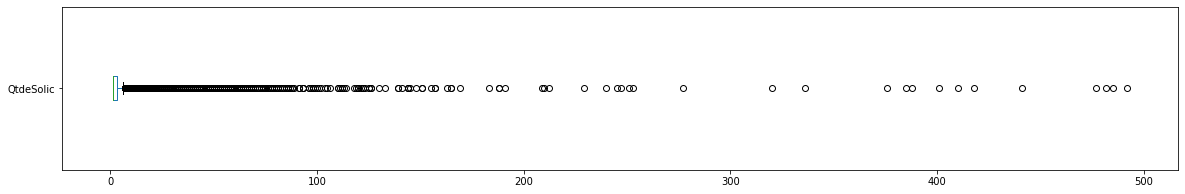

In [8]:
#Contando a quantidade de queixas por pessoa
print(df.QtdeSolic.value_counts().head(),'\n\n')
df.QtdeSolic.plot(kind='box', vert=False, figsize=(20,3))
df[['QtdeSolic']].describe()


In [9]:
#Tipo de serviços que mais gera reclamações
df.Servico.value_counts()

Celular Pós-Pago                           9787
Celular Pré-Pago                           7234
Banda Larga Fixa                           6323
Telefone Fixo                              6200
TV por Assinatura                          5185
Serviços da Anatel                          435
Móvel Pessoal                                96
Radiodifusão (Rádio e TV)                    66
Serviço de Comunicação Multimídia            33
Rádio do Cidadão (PX)                        28
Radioamador (PY)                             15
Serviço Telefônico Fixo Comutado - STFC       7
Limitado Privado                              7
Outros                                        3
Serviço Móvel Aeronáutico                     2
Name: Servico, dtype: int64

In [10]:
#Número de Reclamações por Operadora
df.GrupoEconNorm.value_counts()

OI                   9607
VIVO                 7387
TIM                  7149
CLARO                4631
NET                  3050
SKY                  2141
Outros               1185
NEXTEL                111
HUGHES NET             85
Correios Celular       39
ALGAR                  23
NOSSA TV - BRASIL       4
SERCOMTEL               3
CABO TELECOM            2
Brisanet                1
Datora                  1
Name: GrupoEconNorm, dtype: int64

In [11]:
df.CanalEntrada.value_counts()

Call Center             15475
Fale Conosco            11529
Aplicativo Móvel         8096
Atendimento Pessoal       321
Name: CanalEntrada, dtype: int64

## Por Operadora